In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

# Esercitazione 2 _ Bonato Angela

## Esercizio 2.1

L'esercizio richiedeva una stima del valore dell'integrale $I = \int_0^1 f(x) dx = 1$ con $f(x)=\frac{\pi}{2}\cos(\frac{\pi x}{2})$ mediante metodi Monte Carlo, usando uniform sampling prima e importance sampling poi.

### Uniform sampling

Per la stima tramite uniform sampling ho generato $M=10^6$ valori $x_i \in [0,1]$ distribuiti uniformemente, da cui ho stimato il valor medio dell'integrale tramite la formula $\mathrm{\left<I\right>}=\frac{1}{M}\sum^M_{i=1}f(x_i)$. Ho condotto l'analisi dividendo i numeri generati in $N=100$ blocchi, per ognuno dei quali in figura sono riportati il valor medio e l'errore ottenuti. Il risultato all'ultimo blocco è compatibile con il valore atteso dalla teoria entro $1\sigma$.

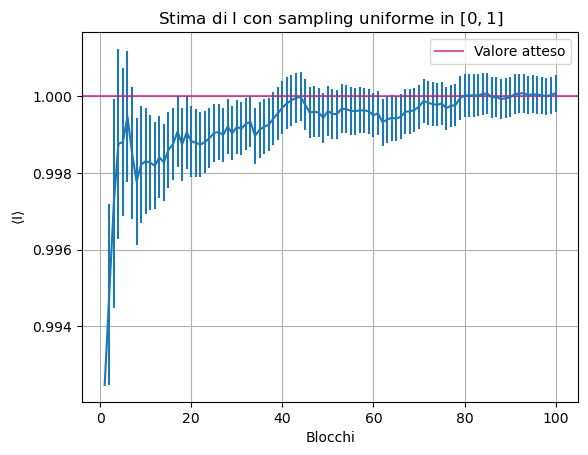

In [2]:
Min=1000000  #numero totale di estrazioni del generatore
Nin=100  #numero di blocchi
Lin=int(Min/Nin)  #numero di estrazioni per blocco
inx=np.arange(Nin)+1  #vettore delle ascisse dei punti plottati

#vettore delle ordinate dei punti plottati
usy, userrorbars=np.loadtxt("unifintegral.dat", delimiter=" ", usecols=(0, 1),  unpack="true") 

plt.errorbar(inx, usy, yerr=userrorbars)
plt.axhline(y=1, color="mediumvioletred", label="Valore atteso", alpha=0.7)
plt.xlabel("Blocchi")
plt.ylabel(r"$\left<\mathrm{I}\right>$")
plt.title(r"Stima di I con sampling uniforme in $[0, 1]$")
plt.grid(True)
plt.legend()
plt.show()

### Importance sampling

Per la stima tramite importance sampling, ho scelto una densità di probabilità $d(x)=\left(\frac{\pi}{3}-x^2\right)\frac{1}{\frac{\pi}{3}-\frac{1}{3}}$ che ben approssimasse la funzione integranda $f(x)$, ho estratto $M=10^6$ valori $x_i\in[0,1]$ distribuiti secondo $d(x)$ con un algoritmo accept&reject e da questi ho calcolato $\mathrm{\left<I\right>}=\frac{1}{N}\sum^N_{i=1}\frac{f(x_i)}{d(x_i)}$. Anche in questo caso, ho diviso l'analisi in $N=100$ blocchi. Il risultato ottenuto è compatibile con la previsione teorica entro $2\sigma$.

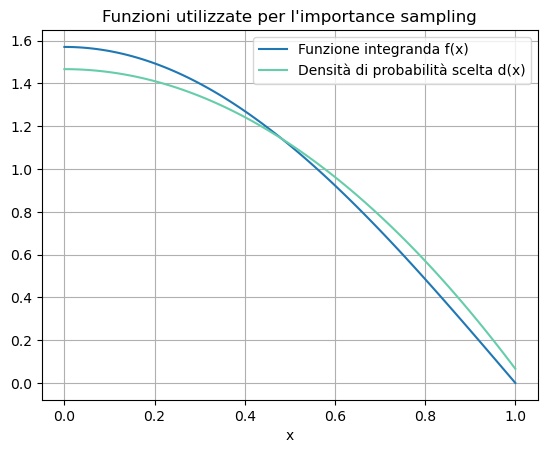

In [3]:
ax=np.linspace(0, 1, 100)  #ascisse

#ordinate delle due funzioni
dx=((np.pi/3)-(ax*ax))*1/((np.pi/3)-(1/3))
fx=(np.pi/2)*np.cos((ax*np.pi)/2)

plt.plot(ax, fx, label="Funzione integranda f(x)")
plt.plot(ax, dx, label="Densità di probabilità scelta d(x)", color="mediumaquamarine")
plt.title("Funzioni utilizzate per l'importance sampling")
plt.xlabel("x")
plt.grid(True)
plt.legend()
plt.show()

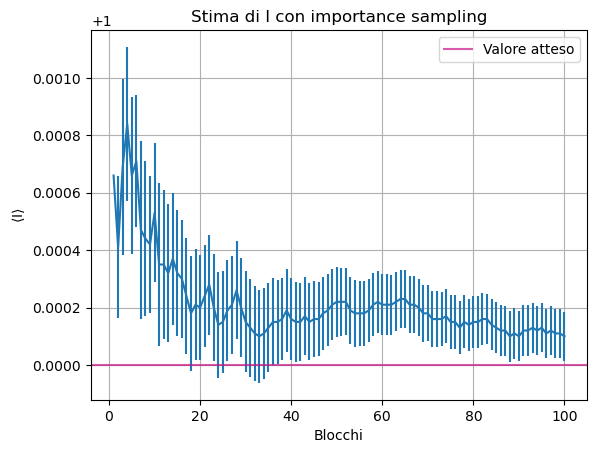

In [4]:
#vettore delle ordinate dei punti plottati e dei relativi errori
isy, iserrorbars=np.loadtxt("importintegral.dat", delimiter=" ", usecols=(0, 1),  unpack="true")  

plt.errorbar(inx, isy, yerr=iserrorbars)
plt.axhline(y=1, color="mediumvioletred", label="Valore atteso", alpha=0.7)
plt.xlabel("Blocchi")
plt.ylabel(r"$\left<\mathrm{I}\right>$")
plt.title(r"Stima di I con importance sampling")
plt.grid(True)
plt.legend()
plt.show()

### Confronto

Confrontando i risultati ottenuti con i due metodi, risulta evidente quanto l'importance sampling riduca l'errore sulla stima calcolata, come atteso. Osservando l'andamento degli errori, inoltre, si riscontra che in entrambi i casi, dopo i primi blocchi, questo tenda a diventare proporzionale a $\frac{1}{\sqrt {i}}$, essendo $i$ il numero di variabili $x_i$ generate. 

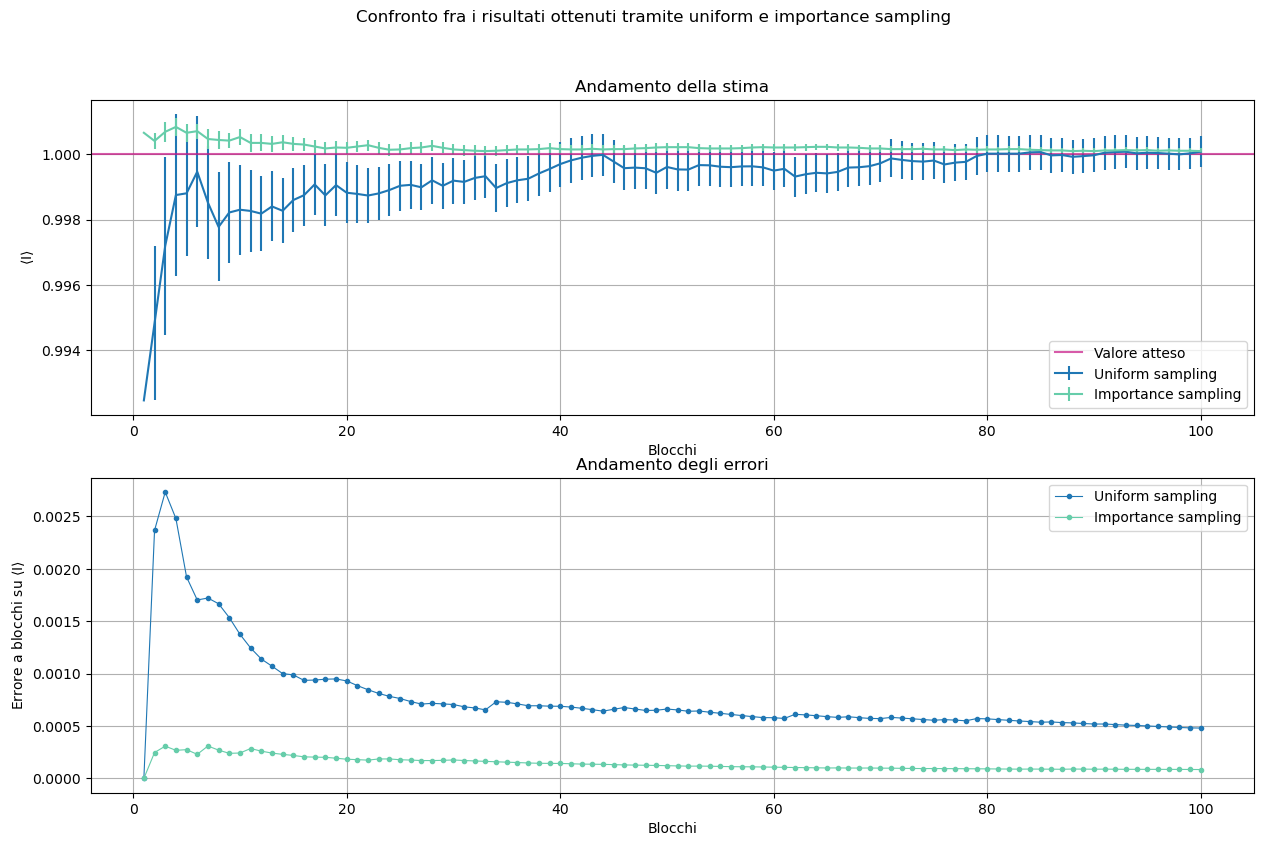

In [5]:
ifig ,(iplt1, iplt2) = plt.subplots(2, 1, figsize=(15, 9))

iplt1.errorbar(inx, usy, yerr=userrorbars, label="Uniform sampling")
iplt1.errorbar(inx, isy, yerr=iserrorbars, label="Importance sampling", color="mediumaquamarine")
iplt1.axhline(y=1, color="mediumvioletred", label="Valore atteso", alpha=0.7)
iplt1.set_xlabel("Blocchi")
iplt1.set_ylabel(r"$\left<\mathrm{I}\right>$")
iplt1.set_title("Andamento della stima")
iplt1.grid(True)
iplt1.legend()

iplt2.plot(inx, userrorbars, label="Uniform sampling", marker='o', markersize=3, linewidth=0.8)
iplt2.plot(inx, iserrorbars, label="Importance sampling", marker='o', markersize=3, linewidth=0.8, color="mediumaquamarine")
iplt2.set_title("Andamento degli errori")
iplt2.set_xlabel("Blocchi")
iplt2.set_ylabel(r"Errore a blocchi su $\left< \mathrm{I} \right>$")
iplt2.grid(True)
iplt2.legend()

ifig.suptitle("Confronto fra i risultati ottenuti tramite uniform e importance sampling")
plt.show()

## Esercizio 2.2

Questo esercizio consisteva nella realizzazione di due random walk, uno in un reticolo 3D discreto e uno in uno spazio 3D continuo. Per ognuno è stato richiesto di valutare il cammino quadratico medio $\sqrt{\langle |\vec{r}_s|^2 \rangle_{RW}}$, in modo da poter verificare il comportamento diffusivo dei due random walk. Il comportamento diffusivo, infatti, implica che l'andamento di $\sqrt{\langle |\vec{r}_s|^2 \rangle_{RW}}$ rispetto al numero di passi $s\in [0,S]$ effettuati dal walker (dunque al tempo $t$) sia proporzionale a $\sqrt{s}$. 

In ambo i casi, ho realizzato $M=10^4$ random walk da $S=100$ passi l'uno e, tramite un'analisi con $N=100$ blocchi, ho calcolato il valor medio e l'errore del cammino quadratico medio ad ogni step. Per rendere più quantitativo il confronto con l'andamento atteso, ho fittato i dati ottenuti dalle simulazioni in modo da ottenere una stima del valore di $k$ tc $\sqrt{\langle |\vec{r}_s|^2 \rangle_{RW}}=k\sqrt{s}$. 

Nelle figure sono riportati i valori medi con errore all'ultimo blocco del cammino quadratico medio per ogni passo dei due random walk. Inoltre, per dar meglio conto del confronto con l'andamento atteso, ho plottato la differenza fra valori fittati ($V_{fit}$) e simulati ($V_{sim}$) con errore, normalizzati secondo il fit a ogni passo.

In [6]:
Srw=100  #numero di steps
rwx=np.arange(Srw)+1  #vettore con le ascisse del plot

#valori medi e errori rw discreto
drwy, derrorbars=np.loadtxt("descreterw.dat", delimiter=" ", usecols=(0, 1),  unpack="true")  
#valori medi e errori rw continuo
crwy, cerrorbars=np.loadtxt("continuumrw.dat", delimiter=" ", usecols=(0, 1),  unpack="true") 

#mi aspetto che i dati siano proporzionali a una radice quadrata ergo 
#faccio un fit per trovare la costante di proporzionalità per le due serie di dati
def attesa(x, k):
    return k*np.sqrt(x)

d_params=curve_fit(attesa, rwx, drwy)
d_k = d_params[0]
print('Fit random walk discreto => k =', d_k)

# Fit continuo con gestione degli errori
c_params=curve_fit(attesa, rwx, crwy)
c_k = c_params[0]
print('Fit random walk continuo => k =', c_k)

Fit random walk discreto => k = [0.99745989]
Fit random walk continuo => k = [1.00069486]


### Random walk discreto

In questo caso ad ogni passo (cioè ad ogni tempo discreto) il walker si muove avanti o indietro nel reticolo discreto con uno step fisso $a=1$ in una sola delle tre direzioni dello spazio ($x$, $y$ o $z$) scelta randomicamente. L'andamento trovato per il cammino quadratico medio risulta in buon accordo con la previsione teorica.

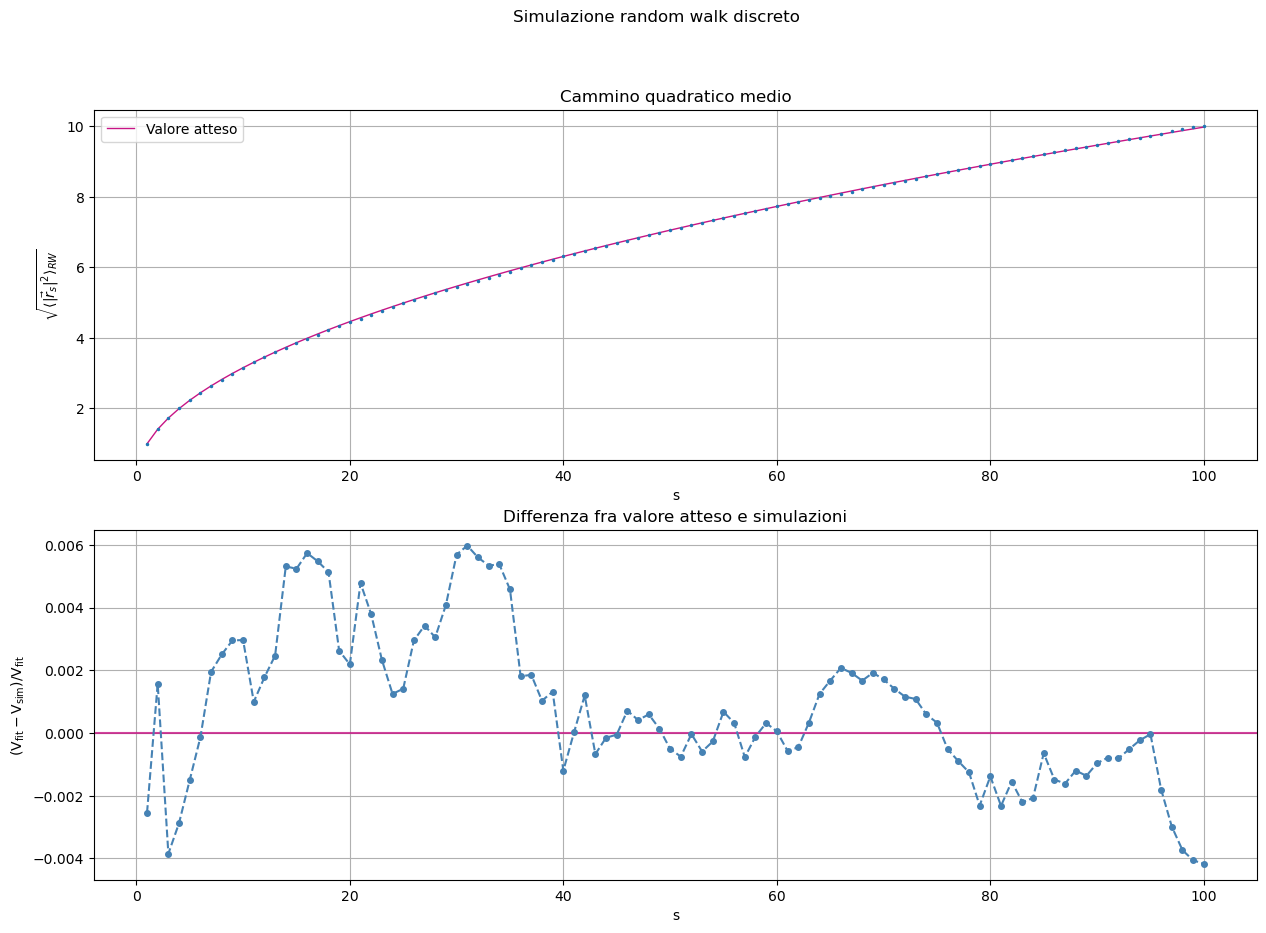

In [7]:
dfig ,(dplt1, dplt2) = plt.subplots(2, 1, figsize=(15, 10))

dplt1.errorbar(rwx, drwy, yerr=derrorbars, fmt='o', linestyle='', elinewidth=0.5, ecolor="steelblue", markersize=1.5)
dplt1.plot(rwx, d_k*np.sqrt(rwx), linewidth=1, color="mediumvioletred", label="Valore atteso")
dplt1.set_xlabel("s")
dplt1.set_ylabel(r"$\sqrt{\langle |\vec{r}_s|^2 \rangle_{RW}}$")
dplt1.set_title("Cammino quadratico medio")
dplt1.grid(True)
dplt1.legend()

dplt2.errorbar(rwx, (d_k*np.sqrt(rwx)-drwy)/(d_k*np.sqrt(rwx)), yerr=derrorbars/(d_k*np.sqrt(rwx)), fmt='o', linestyle='--', elinewidth=1.2, color="steelblue", ecolor="steelblue", markersize=4)
dplt2.axhline(y=0, color="mediumvioletred", alpha=0.8)
dplt2.set_xlabel("s")
dplt2.set_ylabel(r"$\mathrm{ (V_{fit} - V_{sim})/V_{fit} }$")
dplt2.set_title("Differenza fra valore atteso e simulazioni")
dplt2.grid(True)

dfig.suptitle("Simulazione random walk discreto")
plt.show()

### Random walk continuo

Ora per ogni tempo discreto il walker effettua un passo a distanza $a=1$ fissata, in una direzione scelta randomicamente nello spazio, cioè selezionata in modo da coprire uniformemente l'angolo solido definito da $\theta\in[0,\pi]$ e $\varphi \in [0,2\pi]$. Anche in questo caso i risultati risultano in linea con le previsioni.

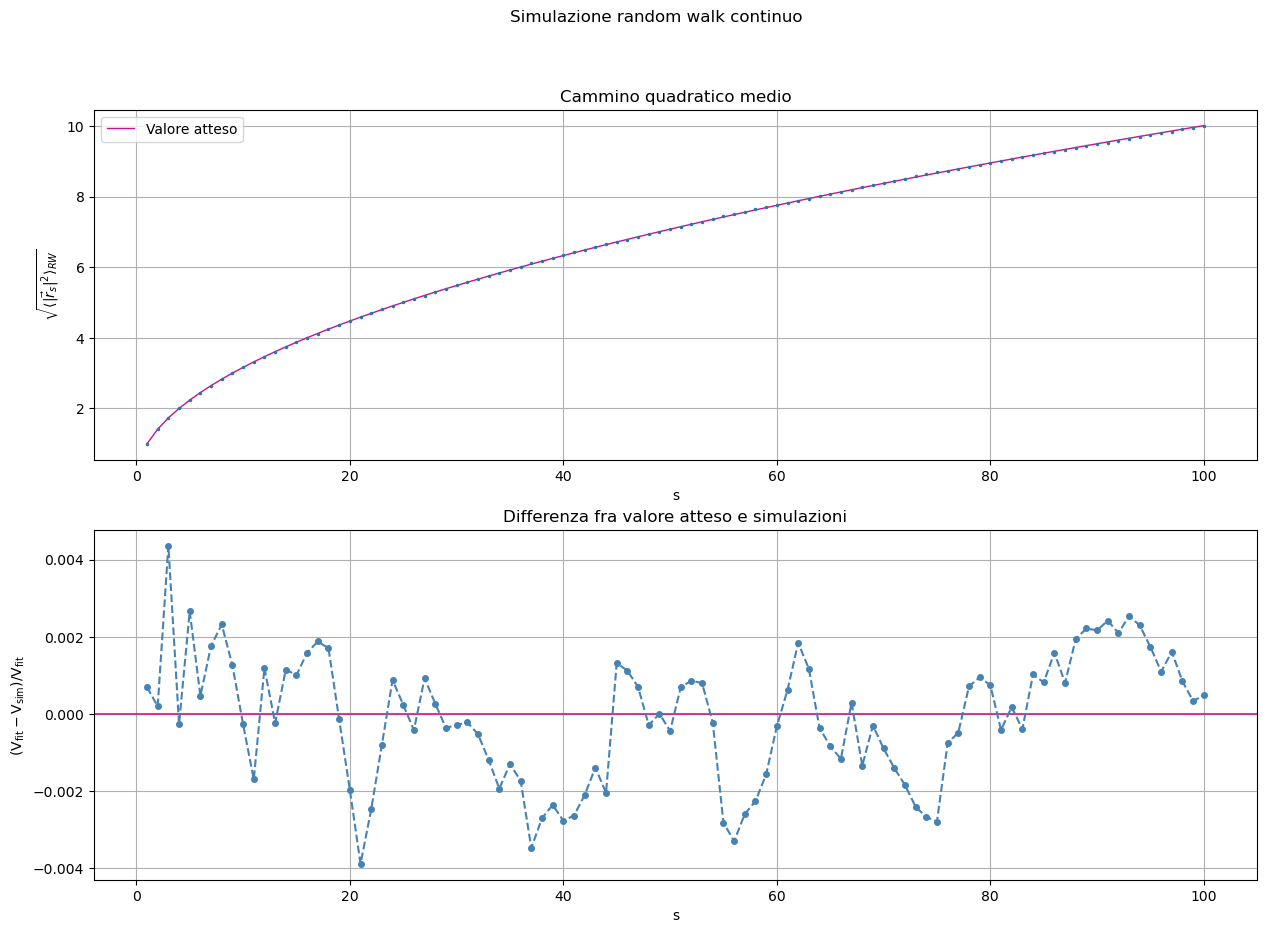

In [8]:
crwy, cerrorbars=np.loadtxt("continuumrw.dat", delimiter=" ", usecols=(0, 1),  unpack="true")  #vettore con le ordinate del plot

cfig ,(cplt1, cplt2) = plt.subplots(2, 1, figsize=(15, 10))

cplt1.errorbar(rwx, crwy, yerr=cerrorbars, fmt='o', linestyle='', elinewidth=0.5, ecolor="steelblue", markersize=1.5)
cplt1.plot(rwx, c_k*np.sqrt(rwx), linewidth=1, color="mediumvioletred", label="Valore atteso")
cplt1.set_xlabel("s")
cplt1.set_ylabel(r"$\sqrt{\langle |\vec{r}_s|^2 \rangle_{RW}}$")
cplt1.set_title("Cammino quadratico medio")
cplt1.grid(True)
cplt1.legend()

cplt2.errorbar(rwx, (c_k*np.sqrt(rwx)-crwy)/(c_k*np.sqrt(rwx)), yerr=cerrorbars/(c_k*np.sqrt(rwx)), fmt='o', linestyle='--', elinewidth=1.2, color="steelblue", ecolor="steelblue", markersize=4)
cplt2.axhline(y=0, color="mediumvioletred", alpha=0.8)
cplt2.set_xlabel("s")
cplt2.set_ylabel(r"$\mathrm{ (V_{fit} - V_{sim})/V_{fit} }$")
cplt2.set_title("Differenza fra valore atteso e simulazioni")
cplt2.grid(True)

cfig.suptitle("Simulazione random walk continuo")
plt.show()